In [1]:
pip install nibabel

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import nibabel as nib
import numpy as np
img=nib.load('BraTS20_Training_001_flair.nii')

In [3]:
print(img.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 240 240 155   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1. 1. 1. 1. 0. 0. 0. 0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 1.0
qoffset_x       : 0.0
qoffset_y       : 239.0
qoffset_z       : 0.0
srow_x          : [-1. -0. -0.  0.]
srow_y          : 

In [4]:
data_array=img.get_fdata()


In [5]:
print(type(data_array))

<class 'numpy.memmap'>


In [6]:
hor_cut=data_array[:,:,70]

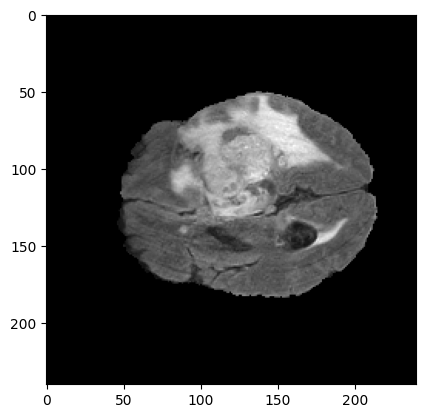

In [7]:
import matplotlib.pyplot as plt
plt.imshow(hor_cut,cmap='gray')
plt.show()

In [8]:

import cv2
def import_image(image_path):
    # Read the image using cv2.imread()
    image = cv2.imread(image_path)
    
    # Return the imported image
    return image
first_image=import_image('photos\sarra_angel.png')
second_image=import_image('photos\sarra_cat.png')
third_image=import_image('photos\sarra_cat_2.png')
fourth_image=import_image('photos\sarra_sad.png')
fifth_image=import_image('photos\sarra_star.png')

KeyboardInterrupt: 

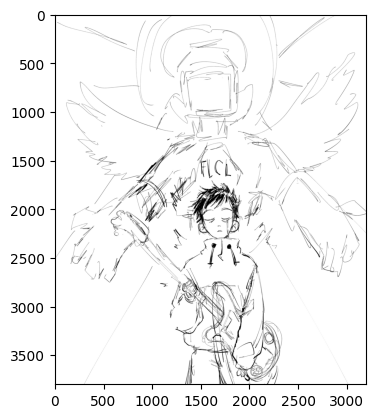

In [ ]:
plt.imshow(first_image)
plt.show()

In [ ]:
import cv2 


def resize_image(image, new_size):
    # Get the current dimensions of the image
    height, width = image.shape[:2]
    aspect_ratio = width / height
    if new_size[0] / new_size[1] > aspect_ratio:
        new_width = int(new_size[1] * aspect_ratio)
        new_height = new_size[1]
    else:
        new_width = new_size[0]
        new_height = int(new_size[0] / aspect_ratio)

    resized_image = cv2.resize(image, (new_width, new_height))
    
    return resized_image
resized_one=resize_image(first_image, (100, 100)) 
resized_one=cv2.cvtColor(resized_one, cv2.COLOR_BGR2GRAY)
resized_two=resize_image(second_image, (100, 100)) 
resized_two=cv2.cvtColor(resized_two, cv2.COLOR_BGR2GRAY)
resized_three=resize_image(third_image, (100, 100))
resized_three=cv2.cvtColor(resized_three, cv2.COLOR_BGR2GRAY)
resized_four=resize_image(fourth_image, (100, 100))
resized_four=cv2.cvtColor(resized_four, cv2.COLOR_BGR2GRAY)
resized_five=resize_image(fifth_image, (100, 100))
resized_five=cv2.cvtColor(resized_five, cv2.COLOR_BGR2GRAY)




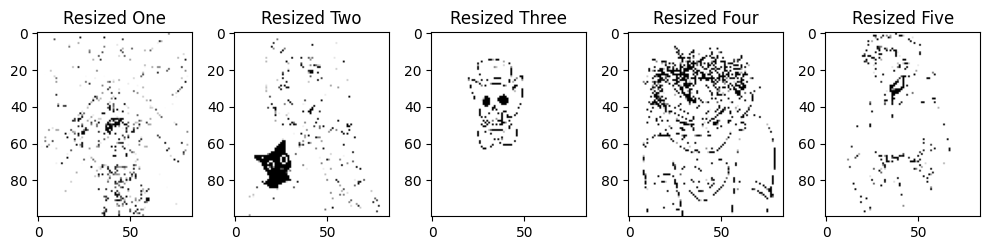

In [ ]:
plt.figure(figsize=(10, 10))

# Create subplots for each resized image
plt.subplot(1, 5, 1)
plt.imshow(resized_one, cmap='gray')
plt.title('Resized One')

plt.subplot(1, 5, 2)
plt.imshow(resized_two, cmap='gray')
plt.title('Resized Two')

plt.subplot(1, 5, 3)
plt.imshow(resized_three, cmap='gray')
plt.title('Resized Three')

plt.subplot(1, 5, 4)
plt.imshow(resized_four, cmap='gray')
plt.title('Resized Four')

plt.subplot(1, 5, 5)
plt.imshow(resized_five, cmap='gray')
plt.title('Resized Five')

plt.tight_layout()
plt.show()


In [ ]:
inverted_one= 255-resized_one
inverted_two= 255-resized_two
inverted_three= 255-resized_three 
inverted_four= 255-resized_four
inverted_five= 255-resized_five
image_list=[inverted_one,inverted_two,inverted_three,inverted_four,inverted_five]

In [ ]:
def image_embedder(data_array,image_list):
    height,width,time=data_array.shape
    new_data_array= np.copy(data_array)
    for t in range(time):
        rate=int(time/len(image_list))
        if t%rate==0:
            x,y=image_list[t//rate].shape
            current_img=image_list[t//rate]
        new_data_array[:x,:y,t]=new_data_array[:x,:y,t]+current_img

    return new_data_array

        

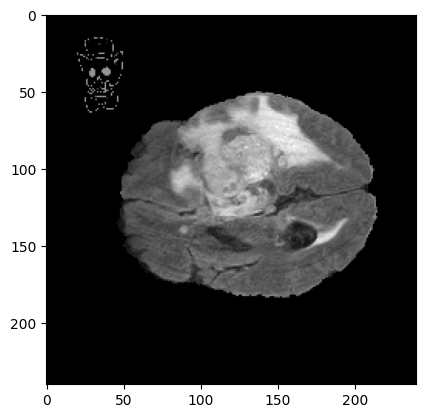

In [ ]:
embedded_data=image_embedder(data_array,image_list)
plt.imshow(embedded_data[:,:,70],cmap='gray')

In [ ]:
# Determine the dimensions of the images
def video_maker(name,data_array):
    height, width,time = data_array.shape
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    fps = 24  # Frames per second
    out = cv2.VideoWriter("videos/"+name+".mp4", fourcc, fps, (width, height),isColor=False)

# Write each image to the video file
    for t in range(time):
        wiw=np.uint8(data_array[:,:,t])
        out.write(wiw)
    out.release()
    print("Video created successfully!")

In [ ]:
video_maker("embedding_photos",embedded_data)

Video created successfully!


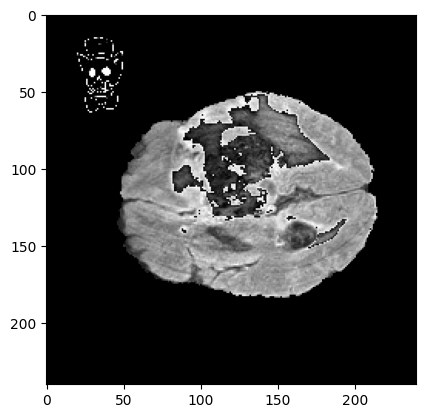

In [ ]:
embedded_data=embedded_data.astype(np.uint8)
plt.imshow(embedded_data[:,:,70],cmap='gray')

In [ ]:
import nibabel as nib
import numpy as np

new_img = nib.Nifti1Image(embedded_data,affine=np.eye(4))
nib.save(new_img, 'new_data\embedded_data_affine_2.nii')
